## Midterm 2 - MNIST Classification
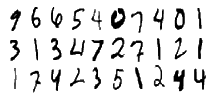
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/r52T6newOqn1Wcw03
#### Commit your code to github/bitbucket into folder midterm


In [11]:
from mnist import MNIST
import random
mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(teimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(teimages[index]))

The amount of train images 60000
The amount of test images 10000
The label of random image 4 The random image is 
............................
............................
............................
............................
............................
..................@.........
.................@@.........
.................@@.........
..........@......@@.........
..........@......@..........
..........@@.....@@.........
.........@@......@@.........
.........@@.....@@@.........
.........@@...@@@@@@........
.........@@@@@@@@@@.........
........@@@@@@@@@@..........
........@@@@@.@@@@..........
...............@@@..........
...............@@@..........
...............@@...........
..............@@@...........
..............@@............
..............@@............
..............@@............
............................
............................
............................
............................


IndexError: list index out of range

In [9]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()



# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255



# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2781 - acc: 0.9210 - val_loss: 0.1412 - val_acc: 0.9574
Epoch 2/10
 - 9s - loss: 0.1115 - acc: 0.9676 - val_loss: 0.0921 - val_acc: 0.9707
Epoch 3/10
 - 10s - loss: 0.0720 - acc: 0.9795 - val_loss: 0.0791 - val_acc: 0.9768
Epoch 4/10
 - 9s - loss: 0.0505 - acc: 0.9859 - val_loss: 0.0750 - val_acc: 0.9771
Epoch 5/10
 - 9s - loss: 0.0374 - acc: 0.9894 - val_loss: 0.0675 - val_acc: 0.9789
Epoch 6/10
 - 9s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0631 - val_acc: 0.9805
Epoch 7/10
 - 9s - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0616 - val_acc: 0.9810
Epoch 8/10
 - 10s - loss: 0.0144 - acc: 0.9967 - val_loss: 0.0627 - val_acc: 0.9806
Epoch 9/10
 - 9s - loss: 0.0113 - acc: 0.9977 - val_loss: 0.0595 - val_acc: 0.9814
Epoch 10/10
 - 10s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0587 - val_acc: 0.9821
Baseline Error: 1.79%


In [4]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# load data
(X_train, y_train)= mndata.load_training()
(X_test, y_test) = mndata.load_testing()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

AttributeError: 'list' object has no attribute 'reshape'

In [5]:


# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model



# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


AttributeError: 'Session' object has no attribute 'list_devices'